In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
data =load_boston()

### concatinating features and data

### splitting the dataset

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target, test_size=0.33, random_state=1307)

In [4]:
data=np.concatenate((X_train,y_train.reshape(-1,1)),axis=1)

In [5]:
def MSE(inst):
    sum1=np.zeros((len(X_test)))
    sum2=np.zeros((len(X_train)))
    for i in range(len(inst)):
        sum1=sum1+np.array(inst[i].predict(X_test))
        sum2=sum2+np.array(inst[i].predict(X_train))
    predict1=sum1/len(inst)
    predict2=sum2/len(inst)
    mse1= (sum((y_test - predict1)**2))/len(y_test)
    mse2= (sum((y_train - predict2)**2))/len(y_train)
    return [mse1,mse2]

In [6]:
class decisionTree:
    def __init__(self,data,index,depth):
        
        if depth==0:
            
            self.leaf = True
            self.prediction = avg(data,index)
            
        elif len(np.unique(data[:,-1])) == 1:
            
            self.leaf = True
            self.prediction = data[0][-1]
            
        else:
            
            self.leaf = False
            self.attr , self.thresh , self.L , self.R = self.split(data,index,depth)
                        
    def split(self,data,index,depth):
        
        n_feature = (data.shape[1])-1
        tmp = np.inf
        shuffle=np.random.permutation(n_feature)
        sam_feature=shuffle[0:5]
        
        for i in sam_feature:
            
            p_thresh = np.unique(data[:,i])
            
            for val in p_thresh:
                
                left = [ j for j in index if data[j][i]<=val ]
                right = [ j for j in index if data[j][i]>val ]
                
                t_rss = rss(data,left) + rss(data,right)
                
                if t_rss < tmp:
    
                    tmp , attr ,thresh, L , R = t_rss , i , val , left , right
        
        return attr , thresh , decisionTree(data,L,depth-1) , decisionTree(data,R,depth-1)
    
    
    def predict_calc(self,data):
        
        if self.leaf==True:
            
            return self.prediction
        
        if data[self.attr]<=self.thresh: # checking for threshold
            
            return self.L.predict_calc(data)   # left side of prediction
        
        else:
            return self.R.predict_calc(data)
    
    def predict(self,data):
        
        return [self.predict_calc(i) for i in data]
    
def avg(data,index):     
    
    if len(index) == 0:
        return 0.0
    return sum([ data[i][-1] for i in index ]) / len(index)

def rss(data,index):
    
    if len(index) == 0:
        return 0.0
    
    mean = avg(data,index)
    
    return sum([ pow( data[i][-1]-mean , 2.0 ) for i in index ])

In [7]:
inst=[]

In [8]:
for i in range(100):
    BST=data[np.random.randint(0,len(X_train),100)]
    indices = list(range(len(BST)))
    inst.append(decisionTree(BST,indices,3))

In [9]:
err= MSE(inst)

In [10]:
err

[15.879973404381515, 15.324357188457064]

In [11]:
# vec1 = different value of depth
# vec2 = different value of bootstrapped data

In [12]:
vec1=3

In [13]:
vec2=[100,130,150,200]

In [14]:
# function for MSE

In [15]:
li=[]
inst=[]
for j in range(len(vec2)) :
    for i in range(vec2[j]):
        BST=data[np.random.randint(0,len(X_train),vec2[j])]
        all_indx = list(range(len(BST)))
        inst.append(decisionTree(BST,all_indx,vec1))
    li.append(MSE(inst))

In [16]:
#plotting 

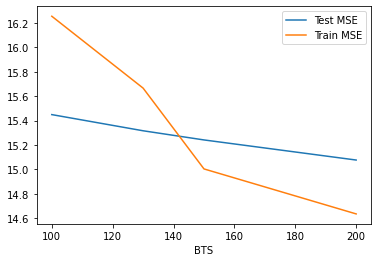

In [17]:
li=np.array(li)
plt.plot(vec2,li[:,0],label='Test MSE')
plt.plot(vec2,li[:,1],label = 'Train MSE')
plt.xlabel('BTS')
plt.legend()

In [18]:
vec3=[2,3,4]
vec4=100

In [19]:
li=[]
inst=[]
for j in range(len(vec3)) :
    for i in range(vec4):
        BST=data[np.random.randint(0,len(X_train),vec4)]
        all_indx = list(range(len(BST)))
        inst.append(decisionTree(BST,all_indx,vec3[j]))
    li.append(MSE(inst))

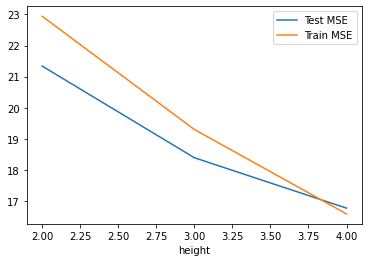

In [20]:
li=np.array(li)
plt.plot(vec3,li[:,0],label='Test MSE')
plt.plot(vec3,li[:,1],label='Train MSE')
plt.xlabel('height')
plt.legend()